This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

## Interpreting what convnets learn

### Visualizing intermediate activations

In [33]:
# You can use this to load the file "convnet_from_scratch_with_augmentation.keras"
# you obtained in the last chapter.
# from google.colab import files
# files.upload()

In [1]:
# import os, shutil, pathlib

# original_dir = pathlib.Path("PetImages")
# new_base_dir = pathlib.Path("cats_vs_dogs_med")

# def make_subset(subset_name, start_index, end_index):
#     for category in ("Cat", "Dog"):
#         dir = new_base_dir / subset_name / category
#         os.makedirs(dir, exist_ok=True)  # Ensure directory exists

#         fnames = [f"{category}/{i}.jpg" for i in range(start_index, end_index)]
#         for fname in fnames:
#             src = original_dir / fname
#             dst = dir / pathlib.Path(fname).name  # Copy file without subdirectory
            
#             if src.exists():  # Check if file exists before copying
#                 shutil.copyfile(src, dst)
#             else:
#                 print(f"Warning: {src} does not exist!")

# make_subset("train", start_index=0, end_index=5000)
# make_subset("validation", start_index=5000, end_index=6500)
# make_subset("test", start_index=6500, end_index=8000)

In [2]:
import pathlib

def count_images(directory):
    """Counts valid images in each subset."""
    for subset in ["train", "validation", "test"]:
        for category in ["Cat", "Dog"]:
            folder = pathlib.Path(directory) / subset / category
            print(f"{subset}/{category}: {len(list(folder.glob('*.jpg')))} images")

count_images("cats_vs_dogs_med")

train/Cat: 4998 images
train/Dog: 4991 images
validation/Cat: 1499 images
validation/Dog: 1496 images
test/Cat: 1498 images
test/Dog: 1498 images


In [3]:
import tensorflow as tf

def preprocess_image(image, label):
    image = tf.image.resize(image, (299, 299))  # Resize to match PyTorch
    image = tf.image.convert_image_dtype(image, tf.float32)  # Convert to float32
    image = (image - 0.5) / 0.5  # Normalize to [-1, 1]
    return image, label

train_dataset = tf.keras.utils.image_dataset_from_directory(
    "cats_vs_dogs_med/train",
    image_size=(299, 299),
    batch_size=32
).map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "cats_vs_dogs_med/validation",
    image_size=(299, 299),
    batch_size=32
).map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    "cats_vs_dogs_med/test",
    image_size=(299, 299),
    batch_size=32
).map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

print("Dataset successfully loaded.")



Found 9989 files belonging to 2 classes.
Found 2995 files belonging to 2 classes.
Found 2996 files belonging to 2 classes.
Dataset successfully loaded.


In [4]:
from tensorflow import keras
from tensorflow.keras import layers
# model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
# model.summary()
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
inputs = keras.Input(shape=(299, 299, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 276s 877ms/step - accuracy: 0.5146 - loss: 0.7807 - val_accuracy: 0.5740 - val_loss: 0.6649
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 275s 878ms/step - accuracy: 0.6051 - loss: 0.6622 - val_accuracy: 0.5189 - val_loss: 0.9665
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 274s 875ms/step - accuracy: 0.6672 - loss: 0.6230 - val_accuracy: 0.5506 - val_loss: 1.1858
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 273s 872ms/step - accuracy: 0.7057 - loss: 0.5809 - val_accuracy: 0.6614 - val_loss: 0.6739
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 274s 874ms/step - accuracy: 0.7395 - loss: 0.5281 - val_accuracy: 0.7870 - val_loss: 0.4631
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 273s 871ms/step - accuracy: 0.7717 - loss: 0.4882 - val_accuracy: 0.7092 - val_loss: 0.7737
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 273s 872ms/step - accuracy: 0.7834 - loss: 0.4670 - val_accuracy: 0.7703 - val_loss: 0.5071
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 273s 872ms/step - accuracy: 0.7957 -

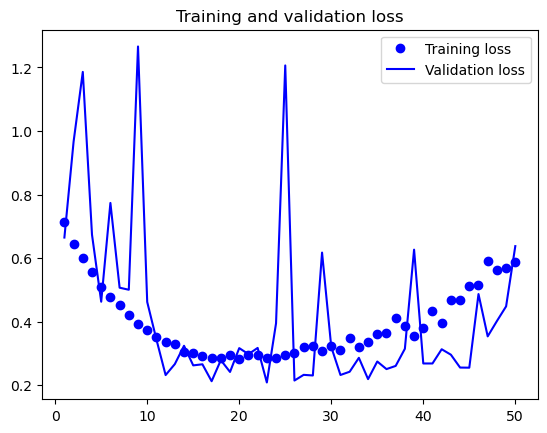

In [5]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

**Preprocessing a single image**

In [6]:
from tensorflow import keras
import numpy as np

img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg")

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(299, 299))

**Displaying the test picture**

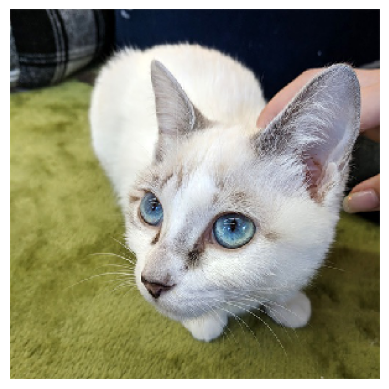

In [7]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

**Instantiating a model that returns layer activations**

In [8]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

**Using the model to compute layer activations**

In [9]:
activations = activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [10]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 297, 297, 32)


**Visualizing the fifth channel**

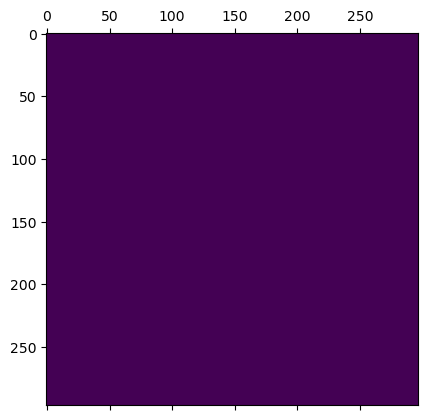

In [34]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

**Visualizing every channel in every intermediate activation**

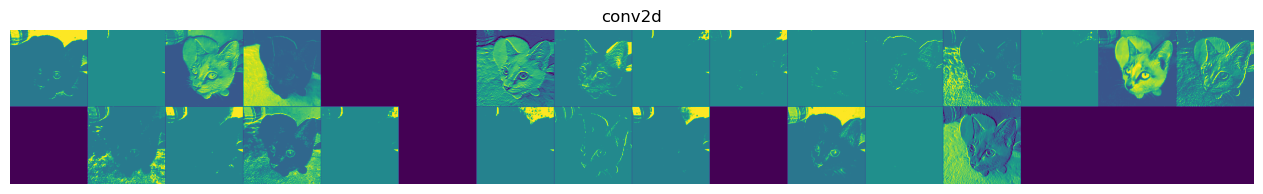

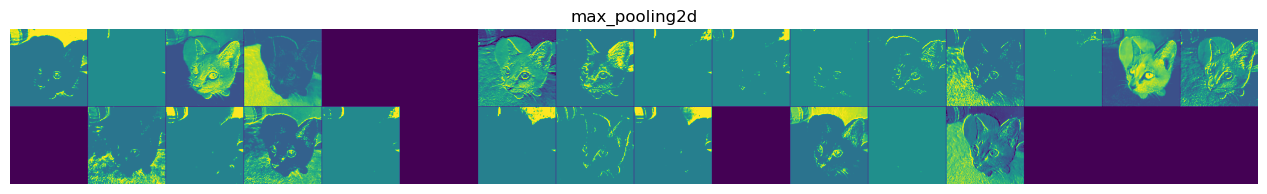

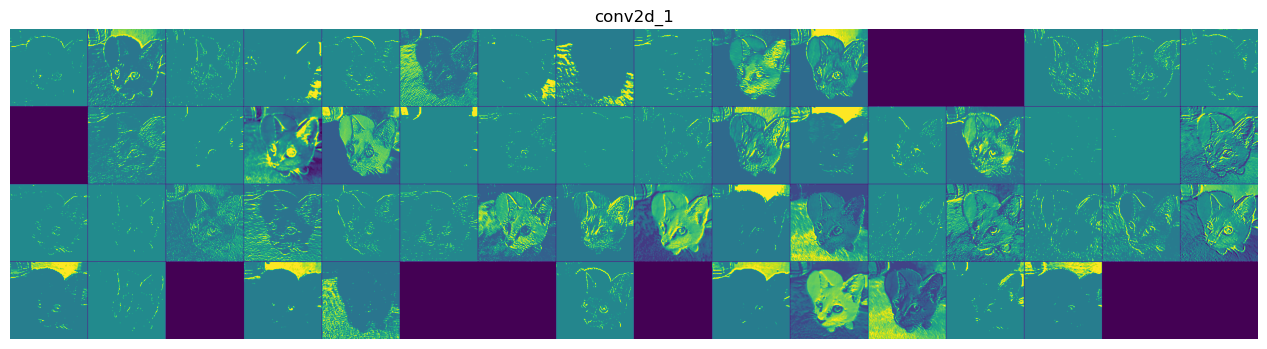

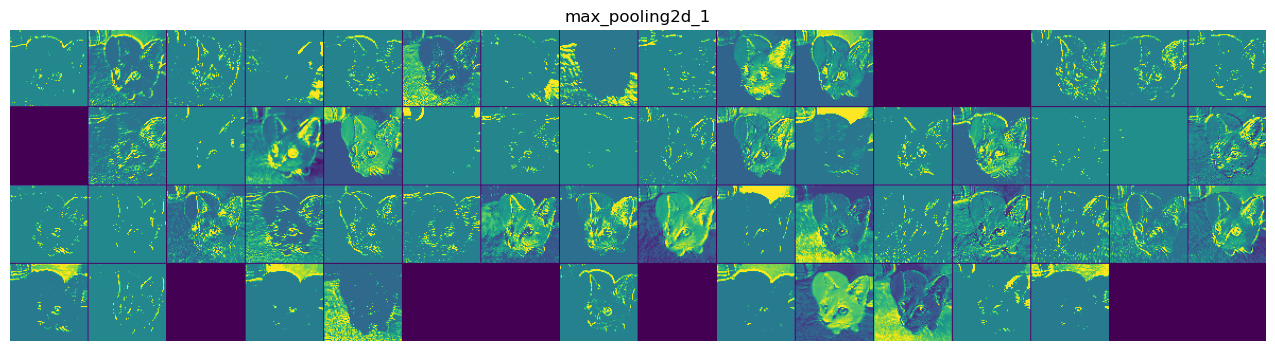

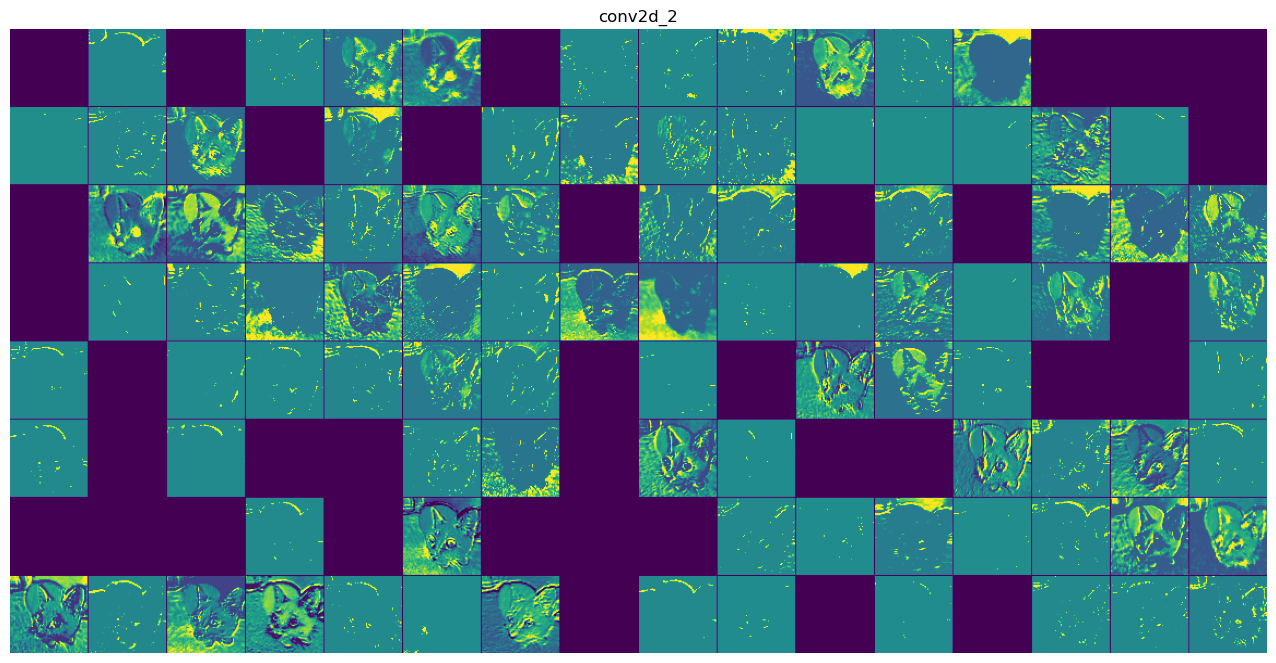

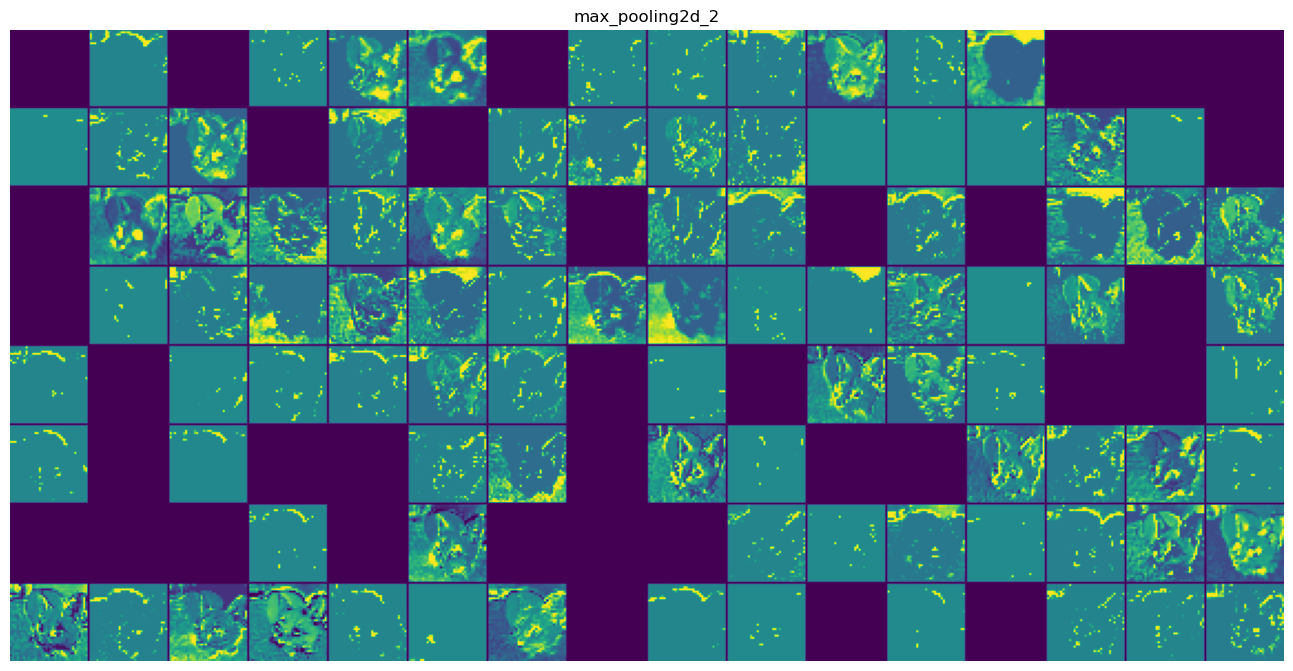

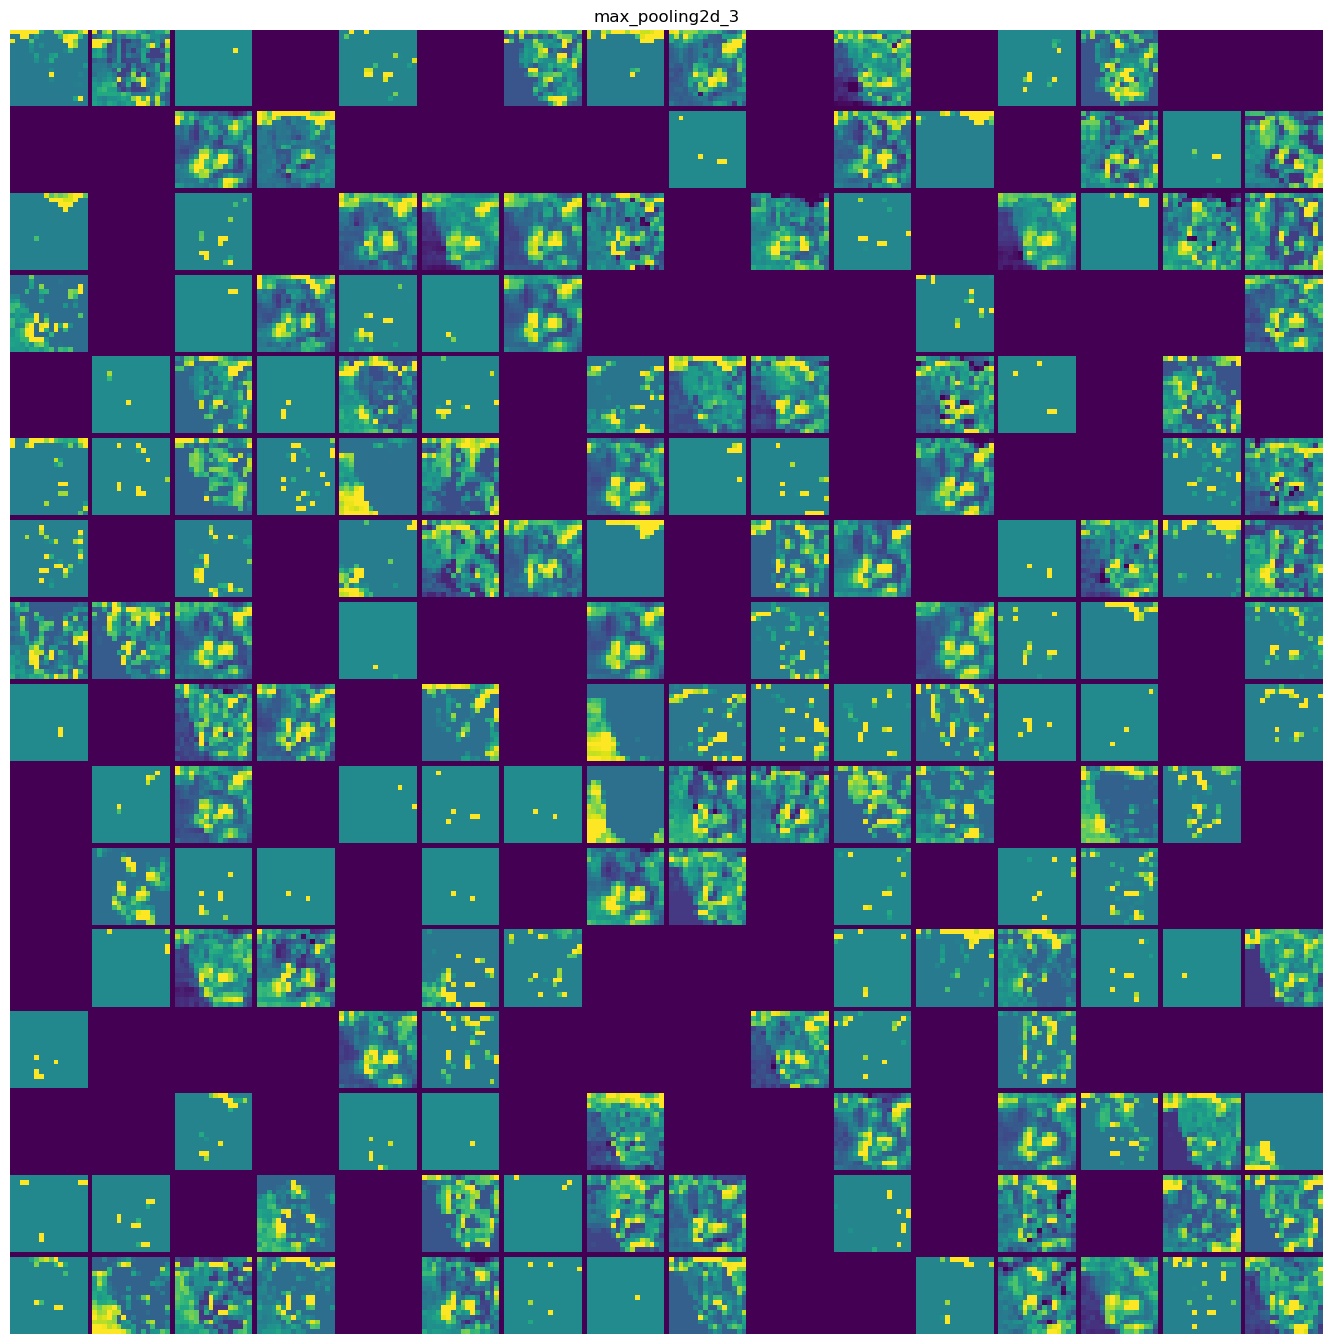

In [35]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

### Visualizing convnet filters

**Instantiating the Xception convolutional base**

In [13]:
model = keras.applications.xception.Xception(
    weights="imagenet",
    include_top=False)

**Printing the names of all convolutional layers in Xception**

In [14]:
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d_5
block3_sepconv1
block3_sepconv2
conv2d_6
block4_sepconv1
block4_sepconv2
conv2d_7
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_8
block14_sepconv1
block14_sepconv2


**Creating a feature extractor model**

In [15]:
layer_name = "block3_sepconv1"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

**Using the feature extractor**

In [16]:
activation = feature_extractor(
    keras.applications.xception.preprocess_input(img_tensor)
)

In [17]:
import tensorflow as tf

def compute_loss(image, filter_index):
    activation = feature_extractor(image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

**Loss maximization via stochastic gradient ascent**

In [18]:
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image, filter_index)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return image

**Function to generate filter visualizations**

In [19]:
img_width = 200
img_height = 200

def generate_filter_pattern(filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform(
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, filter_index, learning_rate)
    return image[0].numpy()

**Utility function to convert a tensor into a valid image**

In [20]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :]
    return image

In [21]:
import random
plt.axis("off")
j = random.randint(0,len(model.layers))
print(f'Layer: {j}')
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=j)))

Layer: 18


**Generating a grid of all filter response patterns in a layer**

In [22]:
all_images = []
for filter_index in range(64):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(filter_index)
    )
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

keras.utils.save_img(
    f"filters_for_layer_{layer_name}.png", stitched_filters)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

### Visualizing heatmaps of class activation

**Loading the Xception network with pretrained weights**

In [23]:
model = keras.applications.xception.Xception(weights="imagenet")

**Preprocessing an input image for Xception**

In [24]:
# img_path = keras.utils.get_file(
#     fname="elephant.jpg",
#     origin="https://img-datasets.s3.amazonaws.com/elephant.jpg")

import random

def get_random_image(directory):
    """Randomly selects an image from the Cat or Dog test directory."""
    category = random.choice(["Cat", "Dog"])
    folder = pathlib.Path(directory) / category
    image_files = list(folder.glob("*.jpg"))  # Get all image files
    return str(random.choice(image_files)) 

img_path = get_random_image("cats_vs_dogs_med/test")
print(img_path)

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = keras.applications.xception.preprocess_input(array)
    return array

img_array = get_img_array(img_path, target_size=(299, 299))

cats_vs_dogs_med\test\Cat\7961.jpg


In [25]:
preds = model.predict(img_array)
print(keras.applications.xception.decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
[('n02123159', 'tiger_cat', 0.4422012), ('n02123045', 'tabby', 0.28668416), ('n02124075', 'Egyptian_cat', 0.019318651)]


In [26]:
np.argmax(preds[0])

282

**Setting up a model that returns the last convolutional output**

In [27]:
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

**Reapplying the classifier on top of the last convolutional output**

In [28]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

**Retrieving the gradients of the top predicted class**

In [29]:
import tensorflow as tf

with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

c:\Users\nick2\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_151']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


**Gradient pooling and channel-importance weighting**

In [30]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

**Heatmap post-processing**

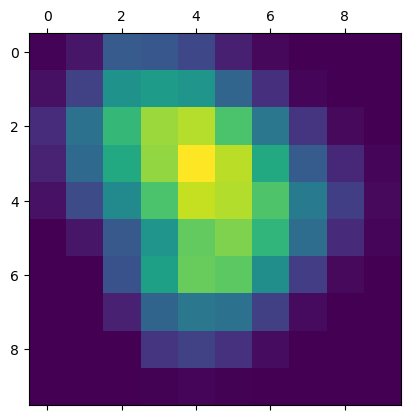

In [31]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

**Superimposing the heatmap on the original picture**

In [32]:
import matplotlib.cm as cm

img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(img)

heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.utils.array_to_img(superimposed_img)

save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

C:\Users\nick2\AppData\Local\Temp\ipykernel_25072\780671328.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


I used pytorch for the last homework, so for this one I just modified the image transform to match (299,299) and left everything in tensorflow.

I also selected a random layer of the Xception model to visualize, and changed the heatmap to display a random image from the cats-vs-dogs dataset.